<a href="https://colab.research.google.com/github/vinicius-mattoso/LearningHub/blob/main/geology/Visualiza%C3%A7ao_de_Well_Logs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução: Arquivos LAS e Interpretação de Well Logs

## O que é um arquivo `.LAS`?

O arquivo **`.LAS` (Log ASCII Standard)** é um **formato padrão da indústria de petróleo e gás** para armazenamento e troca de **dados de perfis de poço (well logs)** em formato texto (ASCII).

Ele foi definido e é mantido pela **CWLS – Canadian Well Logging Society**, com o objetivo de:
- Garantir **interoperabilidade** entre softwares
- Padronizar a forma como **curvas, unidades e metadados** são descritos
- Facilitar o **compartilhamento e arquivamento** de dados de poços

Por ser um arquivo texto:
- Pode ser aberto em qualquer editor
- É legível por humanos
- É amplamente suportado por softwares de geociências (Petrel, Techlog, Interactive Petrophysics, Python, etc.)

---

## Estrutura de um arquivo LAS

Um arquivo `.las` é dividido em **seções**, cada uma iniciada por `~`:

### `~Version`
Define a versão do padrão LAS e regras gerais do arquivo.

### `~Well`
Contém **metadados do poço**, como:
- Nome do poço
- Profundidade inicial e final
- Passo de amostragem
- Valor nulo (NULL)
- Unidade de profundidade (m, ft)

### `~Curves`
Descreve as **curvas registradas no poço**, informando:
- *Mnemonic* (nome curto da curva, ex.: `GR`, `RHOB`)
- Unidade (API, g/cm³, ohm.m, etc.)
- Descrição

Exemplo:

GR.API : Gamma Ray

RHOB.g/cm3 : Bulk Density


### `~Params` (opcional)
Parâmetros adicionais do registro ou do processamento.

### `~Other` (opcional)
Comentários livres.

### `~ASCII`
É a **seção principal de dados**, onde:
- Cada linha representa uma profundidade
- Cada coluna representa uma curva
- A primeira coluna geralmente é a **profundidade**

---

## O que são Well Logs (Wireline Logs)?

**Well logs** (ou **wireline logs**) são **medições físicas indiretas** realizadas ao longo do poço, normalmente com ferramentas descidas por cabo (*wireline*), após ou durante a perfuração.

Essas ferramentas medem propriedades como:
- Radiação natural
- Resistividade elétrica
- Densidade
- Porosidade
- Tempo de trânsito acústico

Cada medição é registrada **continuamente ao longo da profundidade**, resultando em curvas (logs).

---

## O que é interpretação de well logs?

A **interpretação de well logs** é o processo de **transformar essas medições físicas em informações geológicas e petrofísicas**, como:

- Tipo de rocha (litologia)
- Volume de argila
- Porosidade
- Saturação de fluidos
- Identificação de reservatórios
- Correlação estratigráfica entre poços

Ou seja:

> **Logs → propriedades físicas → propriedades da rocha → modelo geológico**

---

## Exemplos clássicos de logs e suas interpretações

### Gamma Ray (GR)
- Mede radioatividade natural
- Alto GR → rochas argilosas (folhelhos)
- Baixo GR → arenitos ou carbonatos limpos
- Muito usado para **identificação litológica** e **correlação**

### Resistividade (RT, ILD, LLD)
- Mede a resistência elétrica da formação
- Alta resistividade → possível presença de hidrocarbonetos
- Baixa resistividade → água salina
- Fundamental para **avaliação de saturação**

### Densidade (RHOB)
- Mede densidade da formação
- Relacionada à porosidade e litologia
- Usada junto com Nêutrons para **crossplots**

### Nêutrons (NPHI)
- Sensível ao hidrogênio
- Indica porosidade aparente
- Afetado por argilas e tipo de fluido

### Sônico (DT)
- Mede tempo de trânsito acústico
- Relacionado à porosidade e propriedades mecânicas
- Muito usado em geomecânica e sísmica

---

## Por que visualizamos logs em "tracks"?

Na prática, os logs são quase sempre visualizados:
- Com **profundidade no eixo vertical**
- Com a profundidade **aumentando para baixo**
- Em **tracks verticais lado a lado**

Esse padrão existe porque:
- Facilita a leitura geológica
- Permite comparar diferentes propriedades na mesma profundidade
- Reproduz o layout clássico usado por geólogos e petrofísicos há décadas

---

## Por que usar Python para leitura e visualização de LAS?

Usar Python permite:
- Automação de workflows repetitivos
- Controle total sobre visualização e processamento
- Integração com Machine Learning, estatística e ciência de dados
- Reprodutibilidade (notebooks versionados)

Neste tutorial, vamos:
1. Ler um arquivo `.las`
2. Explorar suas curvas
3. Converter os dados para `pandas`
4. Visualizar logs no formato clássico de interpretação

O objetivo não é substituir softwares comerciais, mas **entender o dado**, o formato e o processo — passo essencial para qualquer workflow moderno de análise de subsuperfície.


In [45]:
!pip install lasio

In [46]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import lasio
from IPython.display import display, clear_output

### Baixar o arquivo .las

In [47]:
blob_url = "https://github.com/bolgebrygg/Force-2020-Machine-Learning-competition/blob/master/lithology_competition/data/las_files_Lithostrat_data/15_9-13.las"

def github_blob_to_raw(url: str) -> str:
    return url.replace("https://github.com/", "https://raw.githubusercontent.com/").replace("/blob/", "/")

raw_url = github_blob_to_raw(blob_url)
raw_url

'https://raw.githubusercontent.com/bolgebrygg/Force-2020-Machine-Learning-competition/master/lithology_competition/data/las_files_Lithostrat_data/15_9-13.las'

In [48]:
out_path = "15_9-13.las"

r = requests.get(raw_url, timeout=60)
r.raise_for_status()

with open(out_path, "wb") as f:
    f.write(r.content)

print("OK:", out_path, "| bytes:", len(r.content))

OK: 15_9-13.las | bytes: 5876460


### Leitura do arquivo .las

In [49]:
las = lasio.read(out_path)
las

In [50]:
las.well

[HeaderItem(mnemonic="STRT", unit="m", value="25.0", descr=""),
 HeaderItem(mnemonic="STOP", unit="m", value="3283.9641113", descr=""),
 HeaderItem(mnemonic="STEP", unit="m", value="0.152", descr=""),
 HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr=""),
 HeaderItem(mnemonic="COMP", unit="", value="", descr="COMPANY"),
 HeaderItem(mnemonic="WELL", unit="", value="15/9-13 Sleipner East Appr", descr"),
 HeaderItem(mnemonic="FLD", unit="", value="", descr="FIELD"),
 HeaderItem(mnemonic="LOC", unit="", value="", descr="LOCATION"),
 HeaderItem(mnemonic="SRVC", unit="", value="", descr="SERVICE COMPANY"),
 HeaderItem(mnemonic="DATE", unit="", value="2020-08-09 20:01:10   : Log Export"),
 HeaderItem(mnemonic="PROV", unit="", value="", descr="PROVINCE"),
 HeaderItem(mnemonic="UWI", unit="", value="15/9-13", descr="UNIQUE WELL ID"),
 HeaderItem(mnemonic="API", unit="", value="", descr="API NUMBER")]

##### Lista com as curvas exibindo a unidade de cada cruva e a descrição de cada uma

In [51]:
# Lista amigável com mnemonic, unit e description
curves_info = pd.DataFrame(
    [{
        "mnemonic": c.mnemonic.strip(),
        "unit": (c.unit or "").strip(),
        "descr": (c.descr or "").strip()
    } for c in las.curves]
)

curves_info.head(20)


,mnemonic,unit,descr
0,DEPT,m,DEPTH
1,FORCE_2020_LITHOFACIES_CONFIDENCE,_,FORCE_2020_LITHOFACIES_CONFIDENCE
2,FORCE_2020_LITHOFACIES_LITHOLOGY,_,FORCE_2020_LITHOFACIES_LITHOLOGY
3,CALI,in,CALI
4,MUDWEIGHT,_,MUDWEIGHT
5,ROP,m/h,ROP
6,RDEP,ohm.m,RDEP
7,RSHA,ohm.m,RSHA
8,RMED,ohm.m,RMED
9,RXO,ohm.m,RXO


#### Conversão para o formato dataframe

In [52]:
df = las.df()  # index geralmente é DEPTH
print("Shape:", df.shape)
print("Index:", df.index.name, "| min:", df.index.min(), "| max:", df.index.max())
df.columns.tolist()[:30]

Shape: (21441, 20)
Index: DEPT | min: 25.0 | max: 3283.88


['FORCE_2020_LITHOFACIES_CONFIDENCE',
 'FORCE_2020_LITHOFACIES_LITHOLOGY',
 'CALI',
 'MUDWEIGHT',
 'ROP',
 'RDEP',
 'RSHA',
 'RMED',
 'RXO',
 'SP',
 'DTC',
 'NPHI',
 'PEF',
 'GR',
 'RHOB',
 'DRHO',
 'DEPTH_MD',
 'X_LOC',
 'Y_LOC',
 'Z_LOC']

### Visualização da curva do Caliper com a possibilidade de fazer alteração no eixo da profundidade e atualizar o gráfico

## Convenções de visualização adotadas neste notebook

Os gráficos de well logs seguem algumas convenções clássicas de interpretação
utilizadas na indústria de petróleo e gás:

- A **profundidade é exibida no eixo vertical (Y)** e cresce **de cima para baixo**
- Cada curva é plotada como uma **função da profundidade**
- O eixo horizontal (X) representa a **magnitude física da curva**
- Logs são organizados em **tracks verticais**, facilitando comparações na mesma profundidade

Essas convenções são amplamente utilizadas em softwares comerciais de interpretação
(e.g. Techlog, Petrel, Interactive Petrophysics) e são reproduzidas aqui em Python
para garantir leitura e aplicabilidade reais.


## Uso de preenchimento (fill) em curvas de logs

Algumas curvas, como **Gamma Ray (GR)** e **Caliper (CALI)**, são frequentemente
visualizadas com preenchimento entre a curva e um valor de referência (neste caso, x = 0).

O preenchimento:
- melhora a percepção visual de variações ao longo da profundidade
- facilita a identificação de intervalos com valores elevados
- reproduz o padrão clássico de leitura utilizado por geólogos e petrofísicos

Neste notebook, o preenchimento é usado apenas como recurso visual, sem alterar
a interpretação física da curva.


In [53]:
# CALI_COL = "CALI"

# # Dados
# depth = df.index.values.astype(float)
# cali  = df[CALI_COL].astype(float).values

# mask = np.isfinite(depth) & np.isfinite(cali)
# depth = depth[mask]
# cali  = cali[mask]

# z_min_data = float(np.nanmin(depth))
# z_max_data = float(np.nanmax(depth))

# # X max robusto
# x_max = float(np.nanpercentile(cali, 99))
# x_max = max(1.0, x_max)

# # Inputs
# z_top_input = widgets.FloatText(value=z_min_data, description="Depth top:", layout=widgets.Layout(width="260px"))
# z_base_input = widgets.FloatText(value=z_max_data, description="Depth base:", layout=widgets.Layout(width="260px"))

# plot_btn = widgets.Button(description="Plot", button_style="primary")
# reset_btn = widgets.Button(description="Reset", button_style="")
# msg = widgets.HTML(value="")
# out = widgets.Output()

# def _validate_and_clip(z_top, z_base):
#     # Ajusta para ficar dentro do range do poço (clip)
#     z_top  = float(np.clip(z_top,  z_min_data, z_max_data))
#     z_base = float(np.clip(z_base, z_min_data, z_max_data))
#     if z_top >= z_base:
#         raise ValueError("Depth top deve ser menor que Depth base.")
#     return z_top, z_base

# def on_plot_clicked(_):
#     with out:
#         clear_output(wait=True)
#         try:
#             z_top, z_base = _validate_and_clip(z_top_input.value, z_base_input.value)

#             sel = (depth >= z_top) & (depth <= z_base)
#             z   = depth[sel]
#             cal = cali[sel]

#             fig, ax = plt.subplots(figsize=(4.5, 10))
#             ax.plot(cal, z, linewidth=0.9, label="CALI")
#             ax.fill_betweenx(z, 0, cal, alpha=0.25)

#             ax.set_xlabel("CALI (in)")
#             ax.set_ylabel(df.index.name or "DEPT")
#             ax.set_xlim(0, x_max)

#             # profundidade cresce para baixo
#             ax.set_ylim(z_base, z_top)

#             ax.grid(True, alpha=0.25)
#             ax.legend(loc="best", fontsize=9)

#             plt.tight_layout()
#             plt.show()

#             msg.value = f"<span style='color: #2e7d32;'>Plot OK — intervalo: {z_top:.2f} a {z_base:.2f}</span>"
#         except Exception as e:
#             msg.value = f"<span style='color: #c62828;'>Erro: {str(e)}</span>"

# def on_reset_clicked(_):
#     z_top_input.value = z_min_data
#     z_base_input.value = z_max_data
#     msg.value = ""

# plot_btn.on_click(on_plot_clicked)
# reset_btn.on_click(on_reset_clicked)

# controls = widgets.HBox([z_top_input, z_base_input, plot_btn, reset_btn])
# display(widgets.VBox([controls, msg, out]))

# # Opcional: já plota uma vez ao rodar a célula
# on_plot_clicked(None)


#### Maneira mais simples de fazer o plot

Basta fazer a alteração do nome da coluna que deseja fazer o plot, e o mesmo vale para as coordenadas do valor da profundidade

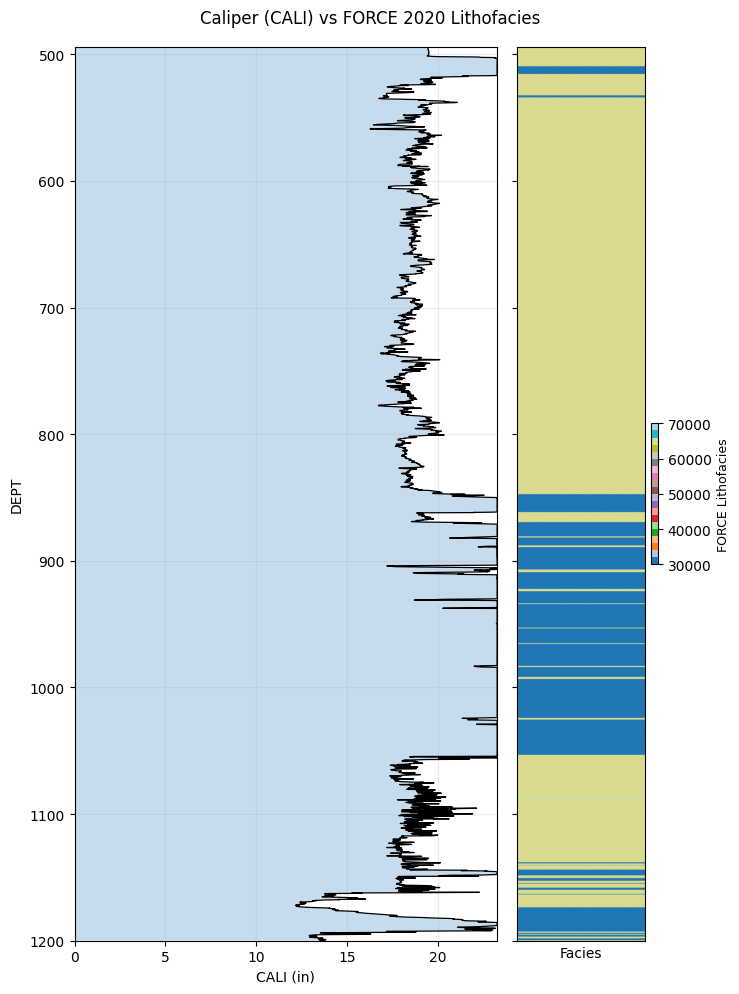

In [54]:
# =========================
# INPUTS DO USUÁRIO (EIXO Y)
# =========================
CALI_COL   = "CALI"
FACIES_COL = "FORCE_2020_LITHOFACIES_LITHOLOGY"

y_min_user = None   # ex: 1200.0 | None = automático
y_max_user = 1200#None   # ex: 1350.0 | None = automático

# =========================
# DADOS
# =========================
depth = df.index.values.astype(float)
cali  = df[CALI_COL].astype(float).values
facies = df[FACIES_COL].values

# Remove NaNs básicos
mask = np.isfinite(depth) & np.isfinite(cali)
depth  = depth[mask]
cali   = cali[mask]
facies = facies[mask]

# =========================
# LIMITES DO EIXO Y (PROFUNDIDADE)
# =========================
y_min_data = float(np.nanmin(depth))
y_max_data = float(np.nanmax(depth))

y_min = y_min_user if y_min_user is not None else y_min_data
y_max = y_max_user if y_max_user is not None else y_max_data

if y_min >= y_max:
    raise ValueError("y_min deve ser menor que y_max")

# Recorte por profundidade
sel = (depth >= y_min) & (depth <= y_max)

depth_sel  = depth[sel]
cali_sel   = cali[sel]
facies_sel = facies[sel]

# =========================
# LIMITES DO EIXO X (CALI)
# =========================
cali_clean = cali_sel[np.isfinite(cali_sel)]
x_min = 0.0
x_max = float(np.nanpercentile(cali_clean, 99))
x_max = max(1.0, x_max)

# =========================
# PLOT
# =========================
fig, axes = plt.subplots(
    ncols=2,
    figsize=(7.5, 10),
    sharey=True,
    gridspec_kw={"width_ratios": [3, 1]}
)

# ---- Track 1: CALI ----
ax = axes[0]
ax.plot(cali_sel, depth_sel, linewidth=0.9, color="black")
ax.fill_betweenx(depth_sel, x_min, cali_sel, alpha=0.25)

ax.set_xlabel("CALI (in)")
ax.set_ylabel(df.index.name or "DEPT")
ax.set_xlim(x_min, x_max)
ax.grid(True, alpha=0.25)

# ---- Track 2: FACIES ----
ax_f = axes[1]

# cria faixa vertical de facies (imagem 2D)
facies_img = facies_sel.reshape(-1, 1)

im = ax_f.imshow(
    facies_img,
    aspect="auto",
    origin="upper",
    extent=[0, 1, depth_sel.max(), depth_sel.min()],
    cmap="tab20"
)

ax_f.set_xticks([])
ax_f.set_xlabel("Facies")

# Colorbar discreta
cbar = plt.colorbar(im, ax=ax_f, fraction=0.05, pad=0.04)
cbar.set_label("FORCE Lithofacies", fontsize=9)

# ---- Profundidade cresce para baixo ----
axes[0].set_ylim(y_max, y_min)

plt.suptitle("Caliper (CALI) vs FORCE 2020 Lithofacies", y=0.99)
plt.tight_layout()
plt.show()

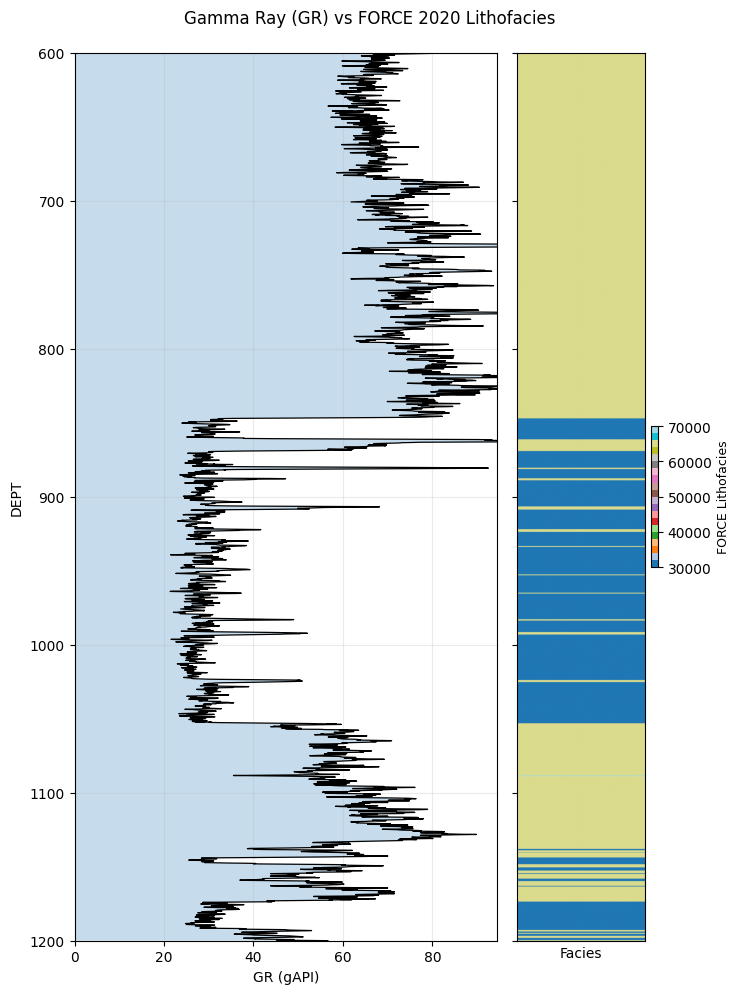

In [55]:
GR_COL     = "GR"
FACIES_COL = "FORCE_2020_LITHOFACIES_LITHOLOGY"

y_min_user = 600#None   # ex: 1200.0 | None = automático
y_max_user = 1200#None   # ex: 1350.0 | None = automático

# =========================
# DADOS
# =========================
depth  = df.index.values.astype(float)
gr     = df[GR_COL].astype(float).values
facies = df[FACIES_COL].values

mask = np.isfinite(depth) & np.isfinite(gr)
depth  = depth[mask]
gr     = gr[mask]
facies = facies[mask]

# =========================
# LIMITES DO EIXO Y
# =========================
y_min_data = float(np.nanmin(depth))
y_max_data = float(np.nanmax(depth))

y_min = y_min_user if y_min_user is not None else y_min_data
y_max = y_max_user if y_max_user is not None else y_max_data

if y_min >= y_max:
    raise ValueError("y_min deve ser menor que y_max")

sel = (depth >= y_min) & (depth <= y_max)

depth_sel  = depth[sel]
gr_sel     = gr[sel]
facies_sel = facies[sel]

# =========================
# LIMITES DO EIXO X (GR)
# =========================
gr_clean = gr_sel[np.isfinite(gr_sel)]
x_min = 0.0
x_max = float(np.nanpercentile(gr_clean, 99)) if len(gr_clean) else 150.0
x_max = max(50.0, x_max)

# =========================
# PLOT
# =========================
fig, axes = plt.subplots(
    ncols=2,
    figsize=(7.5, 10),
    sharey=True,
    gridspec_kw={"width_ratios": [3, 1]}
)

# ---- Track 1: GR ----
ax = axes[0]
ax.plot(gr_sel, depth_sel, linewidth=0.9, color="black")
ax.fill_betweenx(depth_sel, x_min, gr_sel, alpha=0.25)

ax.set_xlabel("GR (gAPI)")
ax.set_ylabel(df.index.name or "DEPT")
ax.set_xlim(x_min, x_max)
ax.grid(True, alpha=0.25)

# ---- Track 2: FACIES ----
ax_f = axes[1]
facies_img = facies_sel.reshape(-1, 1)

im = ax_f.imshow(
    facies_img,
    aspect="auto",
    origin="upper",
    extent=[0, 1, depth_sel.max(), depth_sel.min()],
    cmap="tab20"
)

ax_f.set_xticks([])
ax_f.set_xlabel("Facies")

cbar = plt.colorbar(im, ax=ax_f, fraction=0.05, pad=0.04)
cbar.set_label("FORCE Lithofacies", fontsize=9)

# ---- Profundidade cresce para baixo ----
axes[0].set_ylim(y_max, y_min)

plt.suptitle("Gamma Ray (GR) vs FORCE 2020 Lithofacies", y=0.99)
plt.tight_layout()
plt.show()

## Overlay de curvas e uso de eixos múltiplos

Algumas curvas são tradicionalmente analisadas em conjunto no mesmo track.
Um exemplo clássico é o **overlay de Densidade (RHOB) e Nêutron (NPHI)**.

Neste tipo de visualização:
- As duas curvas compartilham o **mesmo eixo de profundidade**
- Cada curva possui seu **próprio eixo X**, com unidades e escalas distintas
- Os eixos são **coloridos de acordo com a curva correspondente**, reduzindo ambiguidade

Esse padrão permite comparar tendências relativas entre as curvas e é amplamente
utilizado para análise de porosidade, litologia e identificação de efeitos como crossover.


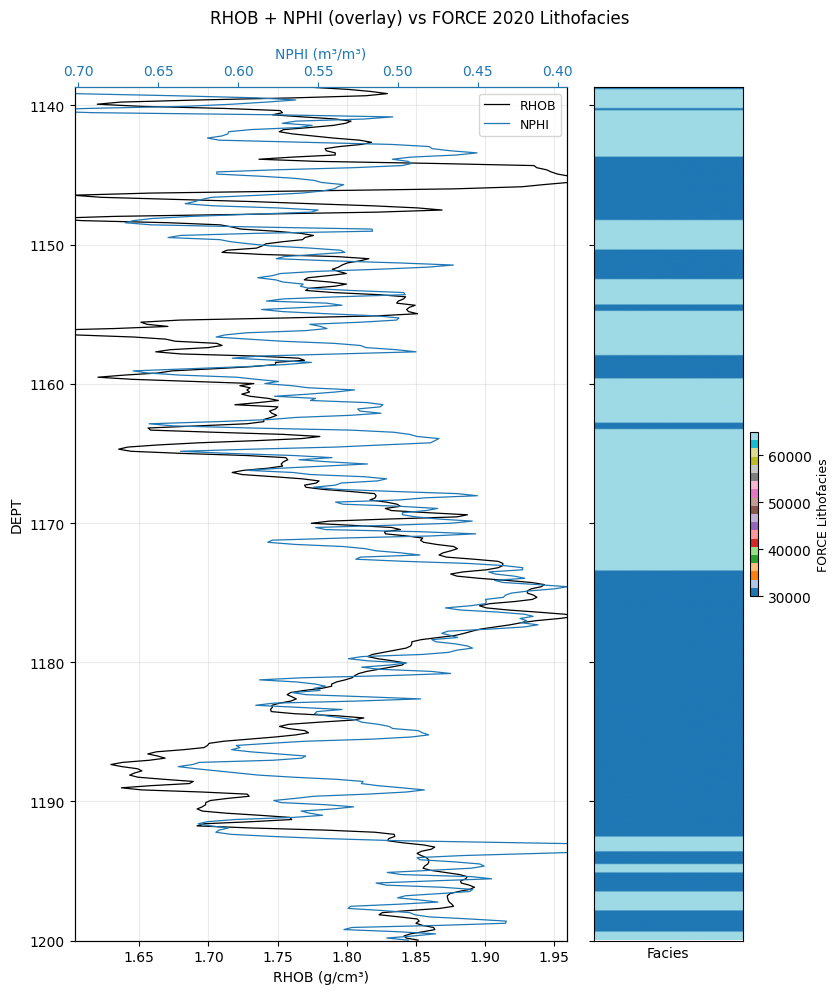

In [56]:
# =========================
# INPUTS DO USUÁRIO (EIXO Y)
# =========================
RHOB_COL   = "RHOB"
NPHI_COL   = "NPHI"
FACIES_COL = "FORCE_2020_LITHOFACIES_LITHOLOGY"

y_min_user = None   # ex: 1200.0 | None = automático
y_max_user = 1200#None   # ex: 1350.0 | None = automático

# =========================
# DADOS
# =========================
depth  = df.index.values.astype(float)
rhob   = df[RHOB_COL].astype(float).values
nphi   = df[NPHI_COL].astype(float).values
facies = df[FACIES_COL].values

mask = np.isfinite(depth) & np.isfinite(rhob) & np.isfinite(nphi)
depth  = depth[mask]
rhob   = rhob[mask]
nphi   = nphi[mask]
facies = facies[mask]

# =========================
# LIMITES DO EIXO Y
# =========================
y_min_data = float(np.nanmin(depth))
y_max_data = float(np.nanmax(depth))

y_min = y_min_user if y_min_user is not None else y_min_data
y_max = y_max_user if y_max_user is not None else y_max_data

if y_min >= y_max:
    raise ValueError("y_min deve ser menor que y_max")

sel = (depth >= y_min) & (depth <= y_max)

depth_sel  = depth[sel]
rhob_sel   = rhob[sel]
nphi_sel   = nphi[sel]
facies_sel = facies[sel]

# =========================
# LIMITES DO EIXO X (ROBUSTOS)
# =========================
rhob_min = np.nanpercentile(rhob_sel, 1)
rhob_max = np.nanpercentile(rhob_sel, 99)
if rhob_min >= rhob_max:
    rhob_min, rhob_max = 1.95, 2.95

nphi_min = np.nanpercentile(nphi_sel, 1)
nphi_max = np.nanpercentile(nphi_sel, 99)
if nphi_min >= nphi_max:
    nphi_min, nphi_max = -0.15, 0.45

# =========================
# CORES (CONSISTENTES)
# =========================
rhob_color = "black"
nphi_color = "tab:blue"

# =========================
# PLOT
# =========================
fig, axes = plt.subplots(
    ncols=2,
    figsize=(8.5, 10),
    sharey=True,
    gridspec_kw={"width_ratios": [3, 1]}
)

# ---- Track RHOB + NPHI ----
ax = axes[0]

# RHOB
ax.plot(rhob_sel, depth_sel, linewidth=0.9, color=rhob_color, label="RHOB")
ax.set_xlabel("RHOB (g/cm³)", color=rhob_color)
ax.set_xlim(rhob_min, rhob_max)
ax.tick_params(axis="x", colors=rhob_color)
ax.spines["bottom"].set_color(rhob_color)
ax.grid(True, alpha=0.25)

# NPHI (eixo superior)
ax2 = ax.twiny()
ax2.plot(nphi_sel, depth_sel, linewidth=0.9, color=nphi_color, label="NPHI")
ax2.set_xlabel("NPHI (m³/m³)", color=nphi_color)
ax2.set_xlim(nphi_min, nphi_max)
ax2.invert_xaxis()  # convenção clássica
ax2.tick_params(axis="x", colors=nphi_color)
ax2.spines["top"].set_color(nphi_color)

# Legenda combinada
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc="best", fontsize=9)

ax.set_ylabel(df.index.name or "DEPT")

# ---- Track FACIES ----
ax_f = axes[1]

facies_img = facies_sel.reshape(-1, 1)
im = ax_f.imshow(
    facies_img,
    aspect="auto",
    origin="upper",
    extent=[0, 1, depth_sel.max(), depth_sel.min()],
    cmap="tab20"
)

ax_f.set_xticks([])
ax_f.set_xlabel("Facies")

cbar = plt.colorbar(im, ax=ax_f, fraction=0.05, pad=0.04)
cbar.set_label("FORCE Lithofacies", fontsize=9)

# ---- Profundidade cresce para baixo ----
axes[0].set_ylim(y_max, y_min)

plt.suptitle("RHOB + NPHI (overlay) vs FORCE 2020 Lithofacies", y=0.99)
plt.tight_layout()
plt.show()

## Observação final

O objetivo deste notebook é demonstrar **como construir visualizações técnicas
de well logs em Python**, reproduzindo padrões usados na prática profissional.

A ênfase está na **clareza do plot**, na **consistência visual** e na **comparação
entre curvas**, e não em cálculos petrofísicos avançados.
